In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os


In [2]:
from fastai.vision.all import *
from pathlib import Path


c:\Users\levi\anaconda3\envs\pt\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
path = Path('../data')
os.chdir(path)


<AxesSubplot: xlabel='flower'>

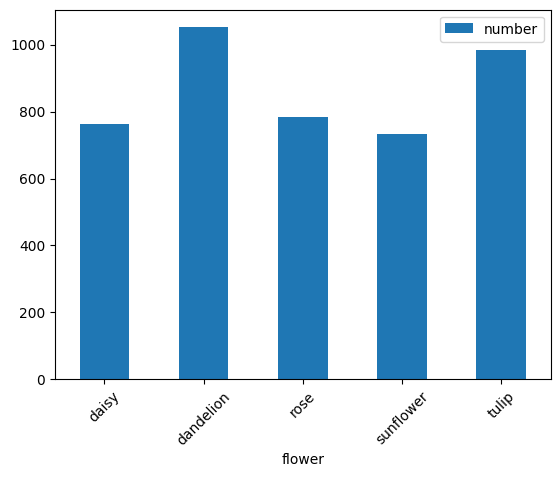

In [13]:
# check number of observations of every class


base_path = Path("./flowers")

infos = {'flower': [],
         'number': []}

for folder in base_path.iterdir():
    if folder.is_dir():
        infos['flower'].append(folder.name)
        infos['number'].append(len(os.listdir(base_path/folder.name)))

pd.DataFrame(infos).set_index('flower').plot(kind='bar', rot=45)


# Apply image augmentation


In [14]:
class AlbumentationsTransform(DisplayedTransform):
    split_idx, order = 0, 2
    def __init__(self, train_aug): store_attr()

    def encodes(self, img: PILImage):
        aug_img = self.train_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)


In [15]:
import albumentations as A


def get_train_aug(): return A.Compose([
    A.RandomCrop(width=224, height=224),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(
        hue_shift_limit=0.2,
        sat_shift_limit=0.2,
        val_shift_limit=0.2,
        p=0.5
    ),
    A.CoarseDropout(p=0.5),
    A.Cutout(p=0.5)
])


item_tfms = [Resize(224), AlbumentationsTransform(get_train_aug())]


c:\Users\levi\anaconda3\envs\pt\lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


# Initiate DataLoaders for batch training

In [16]:
dls = ImageDataLoaders.from_folder(path, get_image_files(path), item_tfms=item_tfms, valid_pct=0.2)


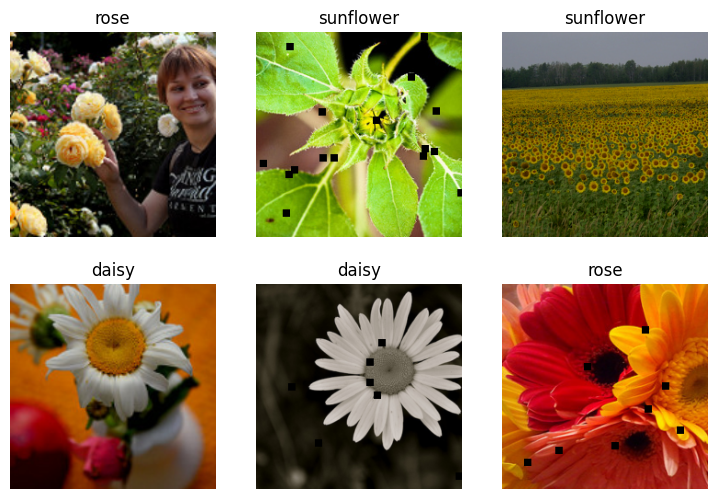

In [17]:
dls.show_batch(max_n=6)


## Instantiate vision model

In [18]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])


c:\Users\levi\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\levi\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Apply transfer learning

In [19]:
learn.fine_tune(5)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.064386,0.424326,0.139050,0.860950,01:41


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.468377,0.332086,0.101970,0.898030,01:08
1,0.323952,0.301809,0.082271,0.917729,01:03
2,0.214658,0.308622,0.076477,0.923523,00:58
3,0.124971,0.268453,0.069525,0.930475,01:02
4,0.084120,0.252163,0.068366,0.931634,01:01


## Check predictions

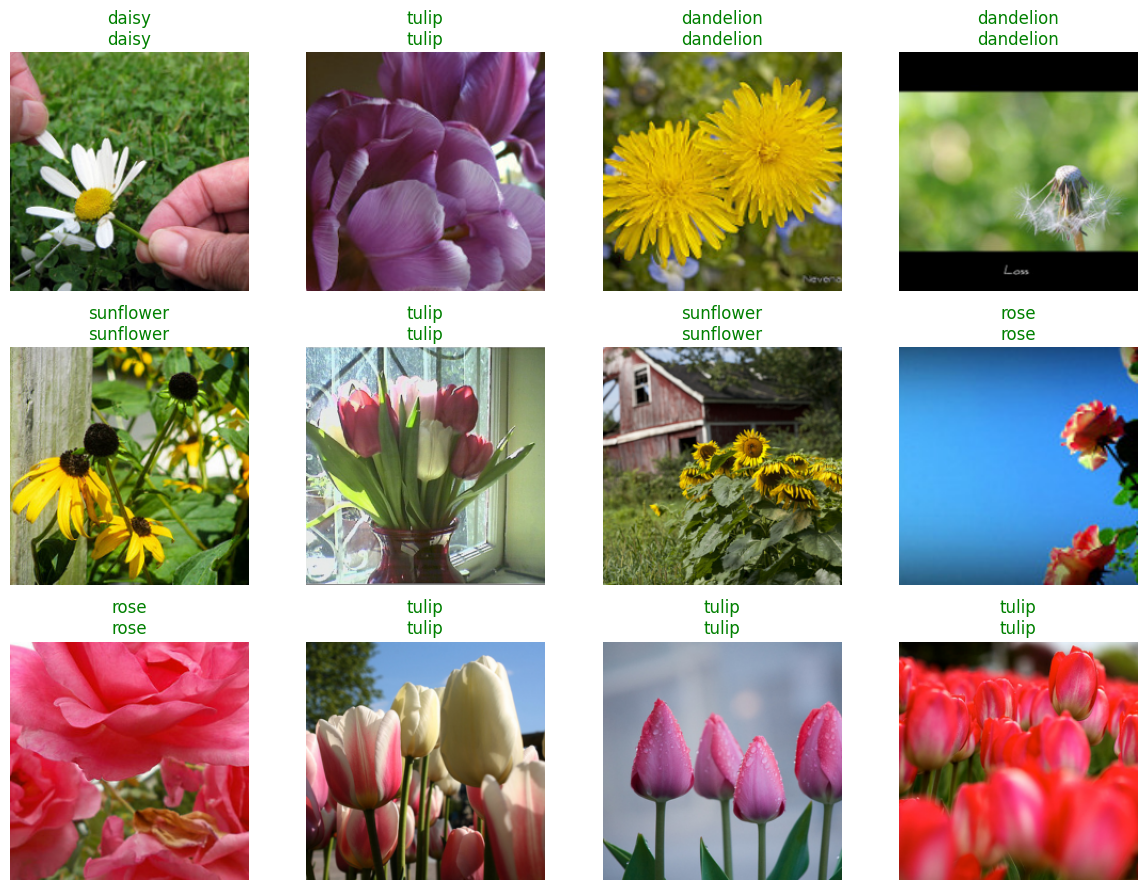

In [20]:
learn.show_results(max_n=12)
plt.tight_layout()


## Predict flow

In [21]:
files = get_image_files(path)


In [24]:
from PIL import Image


In [36]:
def plot_file(f):
    # get title

    parent = f.parent.name

    img = plt.imread(f)
    plt.imshow(img)
    plt.title(parent)
    plt.show()


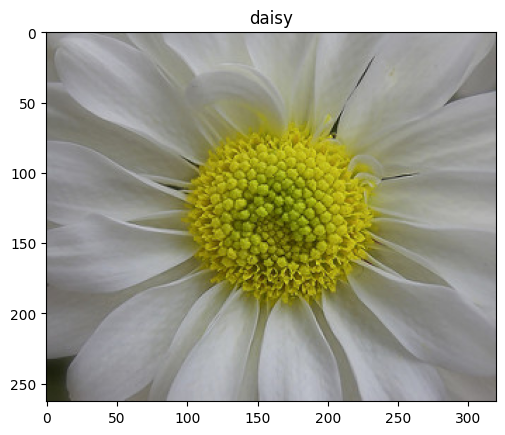

('daisy',
 TensorBase(0),
 TensorBase([9.9997e-01, 2.1993e-05, 8.1444e-08, 3.9510e-06, 2.1566e-08]))

In [40]:
plot_file(files[0])
learn.predict(files[0])


# Plot top losses

In [41]:
interp = Interpretation.from_learner(learn)


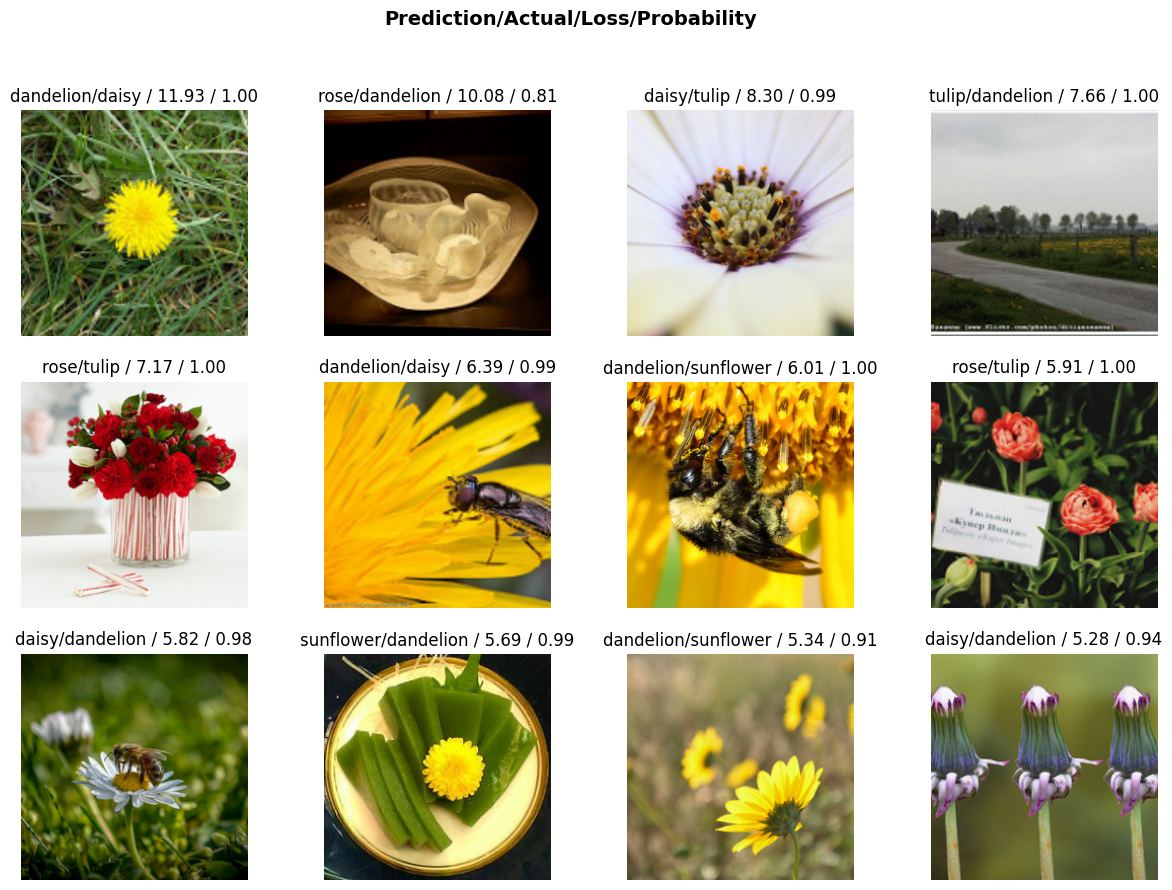

In [42]:
interp.plot_top_losses(12, figsize=(15, 10))
